# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [22]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | devrek
Processing Record 2 of Set 1 | yerofey pavlovich
Processing Record 3 of Set 1 | porto belo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | remire-montjoly
Processing Record 9 of Set 1 | labuan lombok
City not found. Skipping...
Processing Record 10 of Set 1 | bad ems
Processing Record 11 of Set 1 | buraydah
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | vila velha
Processing Record 15 of Set 1 | lonar
Processing Record 16 of Set 1 | geraldton
Processing Record 17 of Set 1 | baikonur
Processing Record 18 of Set 1 | vorgashor
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | zvezdnyy
Processing Record 21 of Set 1 | satkhira
Processing Record 22 of Set 1

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,39.11,52,100,0.00,US,1712459730
1,west island,-12.1568,96.8225,87.78,74,75,6.91,CC,1712459730
2,stanley,54.8680,-1.6985,47.71,81,75,13.80,GB,1712459730
3,kodiak,57.7900,-152.4072,35.11,93,100,12.66,US,1712459730
4,keflavik,64.0049,-22.5624,28.83,59,0,24.16,IS,1712459731


In [13]:
import os

# Definir el nombre del directorio
output_directory = "output_data"

# Crear el directorio si no existe
os.makedirs(output_directory, exist_ok=True)


# Export the City_Data into a csv
city_data_df = pd.DataFrame(city_data)

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,39.11,52,100,0.00,US,1712459730
1,west island,-12.1568,96.8225,87.78,74,75,6.91,CC,1712459730
2,stanley,54.8680,-1.6985,47.71,81,75,13.80,GB,1712459730
3,kodiak,57.7900,-152.4072,35.11,93,100,12.66,US,1712459730
4,keflavik,64.0049,-22.5624,28.83,59,0,24.16,IS,1712459731


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

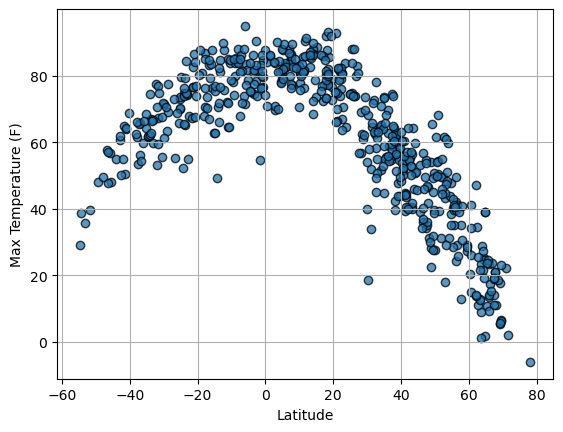

In [35]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

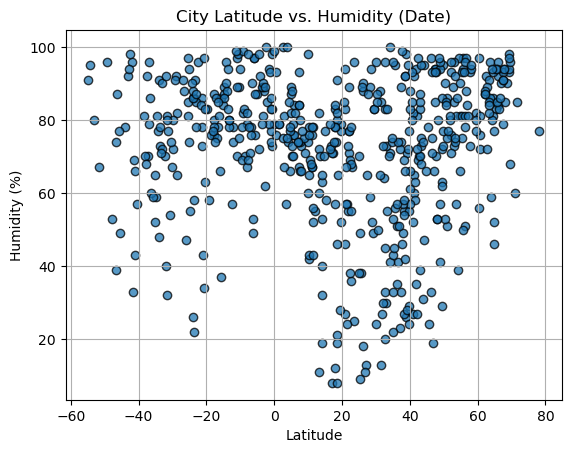

In [18]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

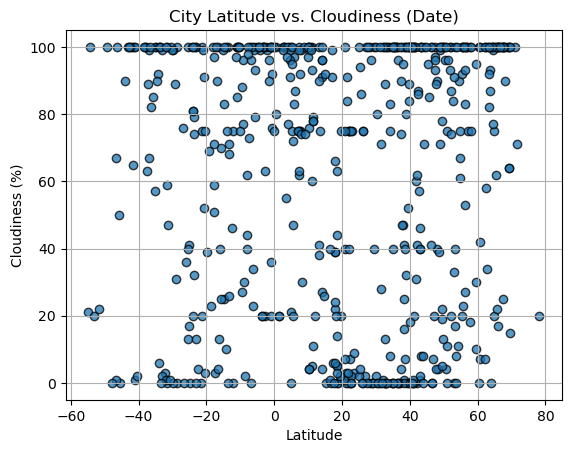

In [19]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

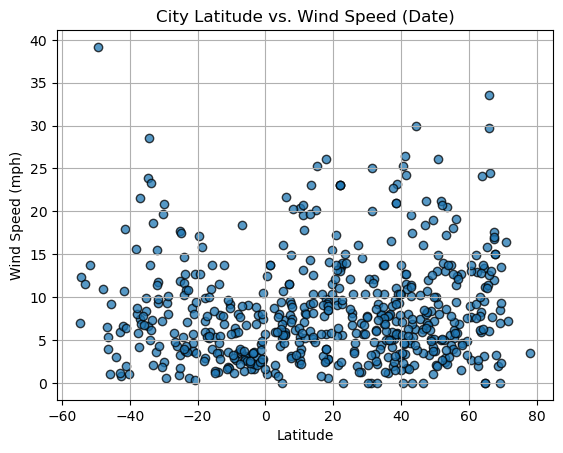

In [20]:
# Build scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-squared is: 0.34998179491627407


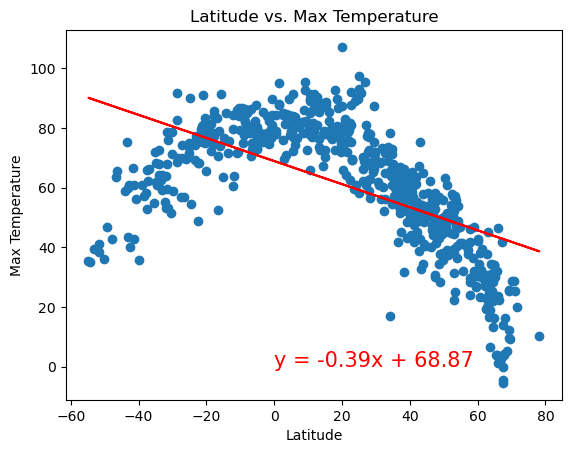

The r-squared is: 0.0002622433615629669


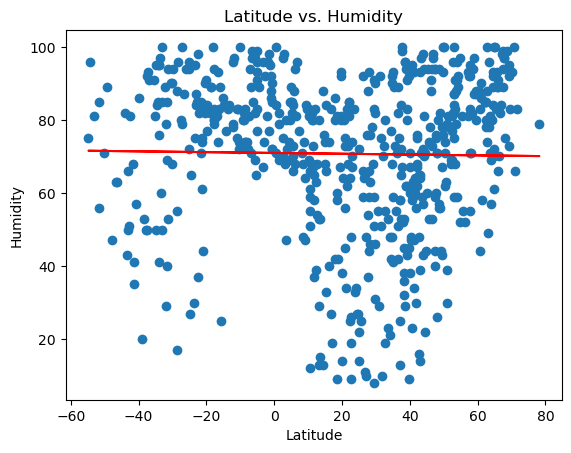

The r-squared is: 0.005367404294737025


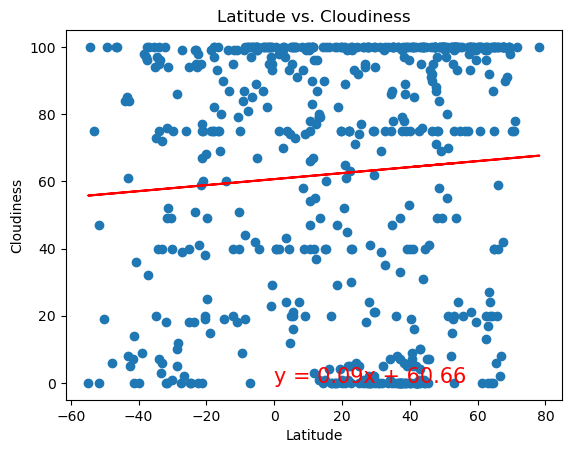

The r-squared is: 0.0002722324122898088


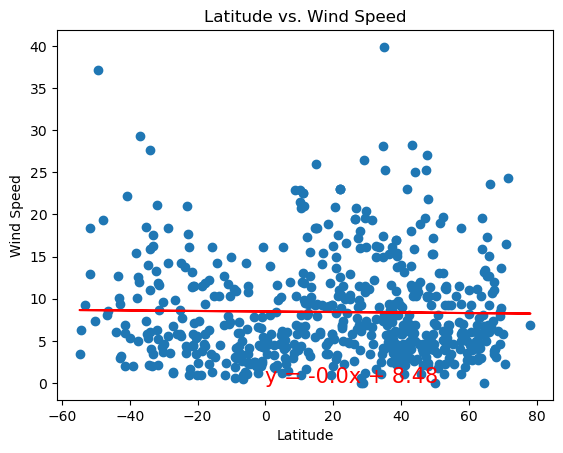

In [27]:
#Linear Regression
def create_linear_regression_plots(x_values, y_values, title, xlabel, ylabel, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line
    regress_values = x_values * slope + intercept

    # Create equation of the line to annotate the plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot
    plt.scatter(x_values,y_values)

    # Plot the regression line
    plt.plot(x_values,regress_values,"r-")

    # Annotate the plot with the equation of the line
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")

    # Add title and labels to the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")

    # Show plot
    plt.show()

# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

# Build scatter plot for latitude vs. temperature
create_linear_regression_plots(city_data_df["Lat"], city_data_df["Max Temp"],
                                "Latitude vs. Max Temperature", "Latitude", "Max Temperature", (0,0))

# Build the scatter plots for latitude vs. humidity
create_linear_regression_plots(city_data_df["Lat"], city_data_df["Humidity"],
                                "Latitude vs. Humidity", "Latitude", "Humidity", (0,0))

# Build the scatter plots for latitude vs. cloudiness
create_linear_regression_plots(city_data_df["Lat"], city_data_df["Cloudiness"],
                                "Latitude vs. Cloudiness", "Latitude", "Cloudiness", (0,0))

# Build the scatter plots for latitude vs. wind speed
create_linear_regression_plots(city_data_df["Lat"], city_data_df["Wind Speed"],
                                "Latitude vs. Wind Speed", "Latitude", "Wind Speed", (0,0))

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,devrek,41.2192,31.9558,41.85,93,16,2.68,TR,1712636728
1,yerofey pavlovich,53.9667,121.9667,36.30,59,93,6.17,RU,1712636886
4,hilo,19.7297,-155.0900,73.27,93,100,9.22,US,1712636696
7,remire-montjoly,4.9167,-52.2667,78.84,89,20,1.14,GF,1712636888
8,bad ems,50.3333,7.7167,63.07,62,99,6.82,DE,1712636889


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,west island,-12.1568,96.8225,87.78,74,75,6.91,CC,1712459730
5,port-aux-francais,-49.3500,70.2167,48.15,96,100,39.17,TF,1712459731
6,port lincoln,-34.7333,135.8667,61.63,59,100,6.58,AU,1712459731
7,waitangi,-43.9535,-176.5597,54.82,78,90,3.00,NZ,1712459731
14,port douglas,-16.4833,145.4667,83.12,78,100,5.19,AU,1712459386


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.8195130795789771


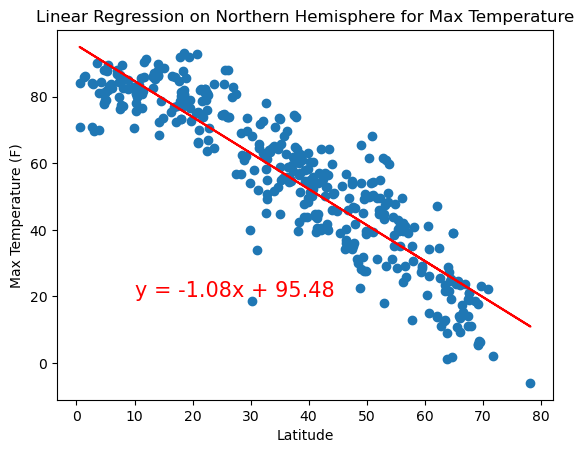

In [27]:
# Perform linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = "Linear Regression on Northern Hemisphere for Max Temperature"
xlabel = "Latitude"
ylabel = "Max Temperature (F)"
coordinates = (10, 20)  # Coordenadas para la ubicación del texto de la ecuación de la línea
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates)


The r-squared is: 0.5628756432310622


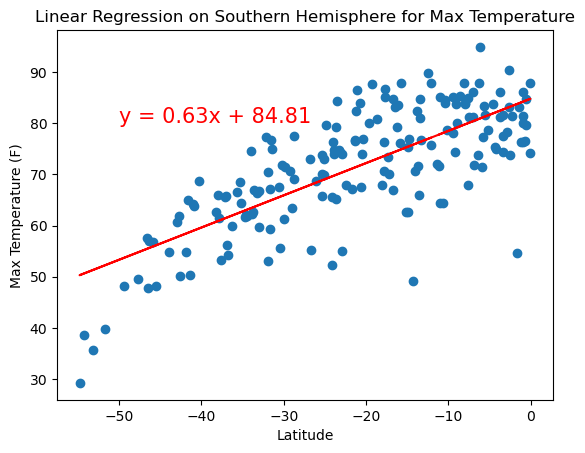

In [28]:
# Perform linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = "Linear Regression on Southern Hemisphere for Max Temperature"
xlabel = "Latitude"
ylabel = "Max Temperature (F)"
coordinates = (-50, 80)  # Coordenadas para la ubicación del texto de la ecuación de la línea
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates)


**Discussion about the linear relationship:**  By conducting this analysis for both hemispheres, we could evaluate how latitude influences temperature and gain a better understanding of climate patterns in different regions of the world.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05652710410974433


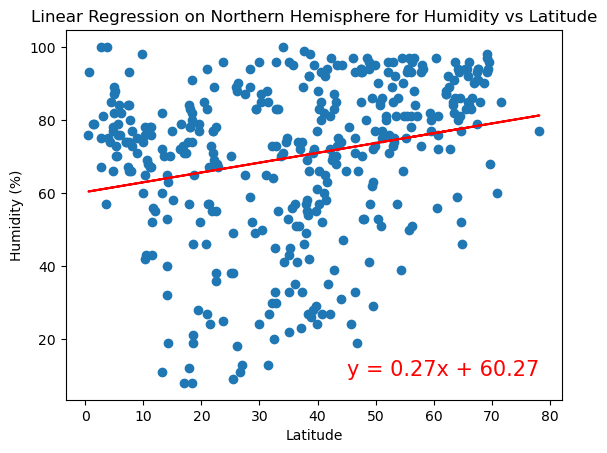

In [29]:
# Perform linear regression on Northern Hemisphere for Humidity vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = "Linear Regression on Northern Hemisphere for Humidity vs Latitude"
xlabel = "Latitude"
ylabel = "Humidity (%)"
coordinates = (45, 10)  # Coordenadas para la ubicación del texto de la ecuación de la línea
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates)


The r-squared is: 0.055395657727110886


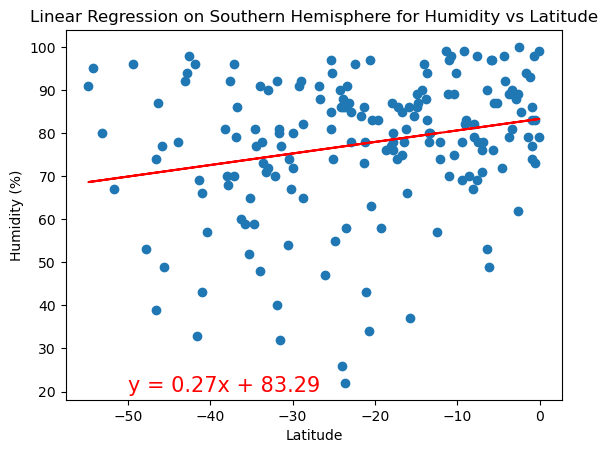

In [30]:
# Perform linear regression on Southern Hemisphere for Humidity vs Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = "Linear Regression on Southern Hemisphere for Humidity vs Latitude"
xlabel = "Latitude"
ylabel = "Humidity (%)"
coordinates = (-50, 20)  # Coordenadas para la ubicación del texto de la ecuación de la línea
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates)


**Discussion about the linear relationship:** Northern Hemisphere: There might be a weak positive correlation between humidity and latitude due to cooler temperatures at higher latitudes.

Southern Hemisphere: There might be a weak negative correlation between humidity and latitude because lower latitudes usually have warmer temperatures.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.01007280847946263


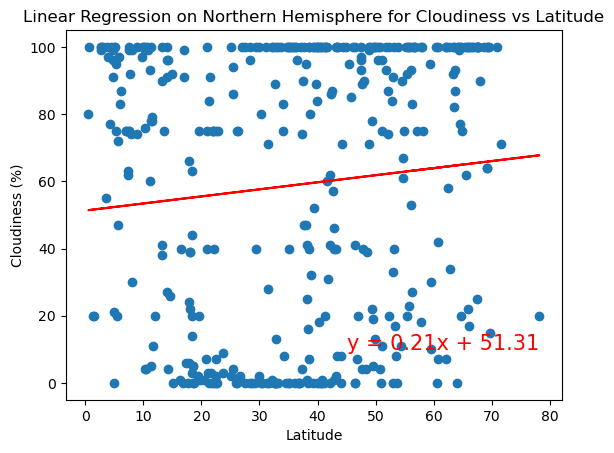

In [31]:
# Perform linear regression on Northern Hemisphere for Cloudiness vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
title = "Linear Regression on Northern Hemisphere for Cloudiness vs Latitude"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
coordinates = (45, 10)  # Coordenadas para la ubicación del texto de la ecuación de la línea
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates)


The r-squared is: 0.01585951680207885


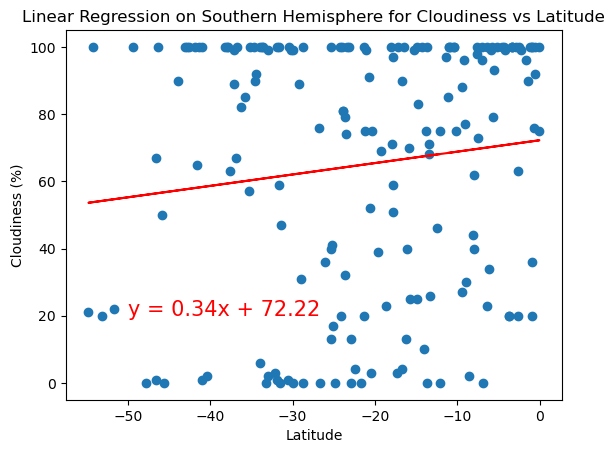

In [32]:
# Perform linear regression on Southern Hemisphere for Cloudiness vs Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
title = "Linear Regression on Southern Hemisphere for Cloudiness vs Latitude"
xlabel = "Latitude"
ylabel = "Cloudiness (%)"
coordinates = (-50, 20)  # Coordenadas para la ubicación del texto de la ecuación de la línea
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates)


**Discussion about the linear relationship:** Northern Hemisphere: There might be a weak positive correlation between cloudiness and latitude, as higher latitudes may experience more varied weather patterns, including increased cloud cover.

Southern Hemisphere: There might be a weak negative correlation between cloudiness and latitude, as lower latitudes often experience more consistent weather with fewer clouds.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003896546807277346


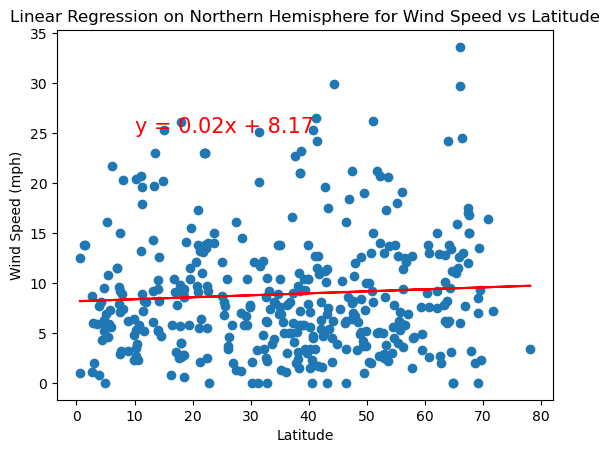

In [33]:
# Perform linear regression on Northern Hemisphere for Wind Speed vs Latitude
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
title = "Linear Regression on Northern Hemisphere for Wind Speed vs Latitude"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
coordinates = (10, 25)  # Coordenadas para la ubicación del texto de la ecuación de la línea
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates)


The r-squared is: 0.11068435397566344


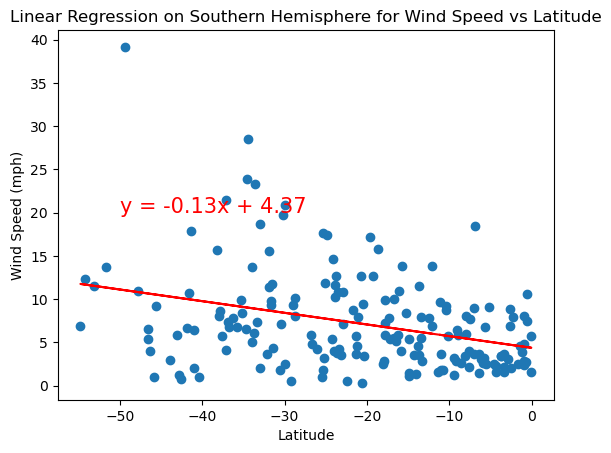

In [36]:
# Perform linear regression on Southern Hemisphere for Wind Speed vs Latitude
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
title = "Linear Regression on Southern Hemisphere for Wind Speed vs Latitude"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
coordinates = (-50, 20)  # Coordenadas para la ubicación del texto de la ecuación de la línea
plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates)


**Discussion about the linear relationship:** Northern Hemisphere: There might be a weak positive correlation between wind speed and latitude, as higher latitudes tend to experience stronger winds due to temperature gradients and atmospheric circulation patterns.

Southern Hemisphere: There might be a weak negative correlation between wind speed and latitude, as lower latitudes generally have weaker winds compared to higher latitudes.